In [1]:
from datetime import date

import duckdb
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')

In [2]:
conn = duckdb.connect('lahnman.duckdb')

# convert to nullable ints
dtypes = {
    'birthYear': pd.Int64Dtype(),
    'birthMonth': pd.Int64Dtype(),
    'birthDay': pd.Int64Dtype(),
    'deathYear': pd.Int64Dtype(),
    'deathMonth': pd.Int64Dtype(),
    'deathDay': pd.Int64Dtype(),

    'weight': pd.Int64Dtype(),
    'height': pd.Int64Dtype(),
}

mostly_current_players = """\
SELECT *
FROM people
WHERE
    deathYear IS NULL
    AND (
        birthYear > 1982 -- younger than 40
        OR finalGame LIKE '2021%'  -- played last year
    )
"""
df = conn.execute(mostly_current_players).fetchdf()

for col, dt in dtypes.items():
    df[col] = df[col].astype(dt)

len(df)

3358

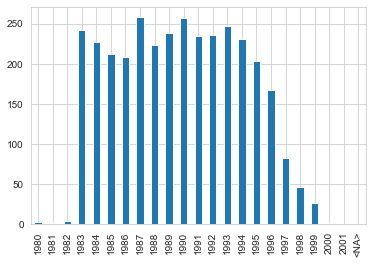

In [3]:
df['birthYear'].value_counts(dropna=False).sort_index().plot(kind='bar');

In [4]:
df.sort_values('birthYear').head()

,ID,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
2520,14808,pujolal01,1980,1,16,D.R.,Distrito Nacional,Santo Domingo,<NA>,<NA>,<NA>,NaN,NaN,NaN,Albert,Pujols,Jose Alberto,235,75,R,R,2001-04-02,2021-10-03,pujoa001,pujolal01
688,4019,cruzne02,1980,7,1,D.R.,Monte Cristi,Las Matas de Santa Cruz,<NA>,<NA>,<NA>,NaN,NaN,NaN,Nelson,Cruz,Nelson Ramon,230,74,R,R,2005-09-17,2021-10-03,cruzn002,cruzne02
1522,8235,hillri01,1980,3,11,USA,MA,Boston,<NA>,<NA>,<NA>,NaN,NaN,NaN,Rich,Hill,Richard Joseph,221,77,L,L,2005-06-15,2021-09-30,hillr001,hillri01
3237,19070,wainwad01,1981,8,30,USA,GA,Brunswick,<NA>,<NA>,<NA>,NaN,NaN,NaN,Adam,Wainwright,Adam Parrish,230,79,R,R,2005-09-11,2021-09-28,waina001,wainwad01
2346,14278,perezol01,1981,8,15,Mexico,Sinaloa,Culiacan,<NA>,<NA>,<NA>,NaN,NaN,NaN,Oliver,Perez,Oliver,225,75,L,L,2002-06-16,2021-04-22,pereo002,perezol01
